This notebook is focused on the answers to the Challenge 1: Data Exploration.
This is not designed for extensive EDA, or for the machine learning portion of the Capstone project.

These are the required libraries for this part of the project.
sklearn is not yet required.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Only the training set needs to be imported.
However, the labels need to be merged into the training set in order to meet the requirements of the assignment.

In [29]:
#quaketest = pd.read_csv('test_values.csv')
quaketrain = pd.read_csv('train_values.csv')
quaketrainlabels = pd.read_csv('train_labels.csv')
quaketrainlabeled = quaketrain.merge(quaketrainlabels, left_on='building_id', right_on='building_id')

Descriptive statistics are sufficient to answer:

- Minimum Height
- Maximium Height
- Mean Height
- Median Height
- Standard Deviation of Height

In [30]:
print(quaketrain.describe())

        building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
count  10000.000000    10000.000000    10000.000000    10000.000000   
mean    9987.160000        7.135600      296.930300     2678.617900   
std     5800.800829        6.225567      279.390651     2520.663769   
min        1.000000        0.000000        0.000000        0.000000   
25%     4998.750000        2.000000       60.000000      606.750000   
50%     9963.500000        6.000000      219.000000     1937.500000   
75%    15044.750000       10.000000      466.000000     4158.000000   
max    19999.000000       30.000000     1411.000000    12151.000000   

       count_floors_pre_eq           age          area        height  \
count         10000.000000  10000.000000  10000.000000  10000.000000   
mean              2.146700     25.393500     38.438100      4.653100   
std               0.736365     64.482893     21.265883      1.792842   
min               1.000000      0.000000      6.000000      1.000000   


The distribution of damage grade uses a histogram in the assignment - I'll be trying to match their histogram.

Histogram A:
https://prod-edxapp.edx-cdn.org/assets/courseware/v1/e7c69fc8b49cccb6f65c9da78663298b/asset-v1:Microsoft+DAT102x+1T2018+type@asset+block/Damage-Grade-A.png

Histogram B:
https://prod-edxapp.edx-cdn.org/assets/courseware/v1/1272a42411edb0a43ab7065f1d5a311e/asset-v1:Microsoft+DAT102x+1T2018+type@asset+block/Damage-Grade-B.png

Histogram C:
https://prod-edxapp.edx-cdn.org/assets/courseware/v1/1272a42411edb0a43ab7065f1d5a311e/asset-v1:Microsoft+DAT102x+1T2018+type@asset+block/Damage-Grade-C.png

Histogram D:
https://prod-edxapp.edx-cdn.org/assets/courseware/v1/1272a42411edb0a43ab7065f1d5a311e/asset-v1:Microsoft+DAT102x+1T2018+type@asset+block/Damage-Grade-D.png

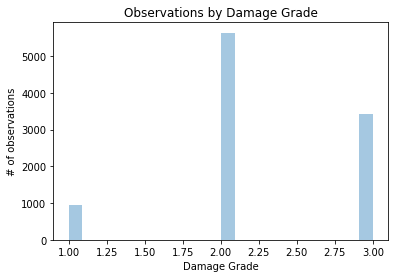

In [31]:
sns.distplot(quaketrainlabels['damage_grade'], kde=False)
plt.xlabel('Damage Grade')
plt.ylabel('# of observations')
plt.title('Observations by Damage Grade')
plt.show()

This histogram matches Histogram A.

The next goal is to determine the average age of the buildings based on their damage grade.

In [32]:
average_age = np.mean(quaketrainlabeled['age'])

agesummary = pd.pivot_table(quaketrainlabeled, index='damage_grade', values='age', aggfunc=np.mean )
agesummary['over_average'] = agesummary['age'].apply(lambda x: True if x > average_age  else False)
print(agesummary)

                    age  over_average
damage_grade                         
1             12.633262         False
2             26.965046          True
3             26.301810          True


The next goal is to determine the average height of the buildings based on their damage grade.
In addition, whether or not the height per damage grade is over average needs to be determined.

In [33]:
average_height = np.mean(quaketrainlabeled['height'])

heightsummary = pd.pivot_table(quaketrainlabeled, index='damage_grade', values='height', aggfunc=np.mean )
heightsummary['over_average'] = heightsummary['height'].apply(lambda x: True if x > average_height  else False)
print(heightsummary)

                height  over_average
damage_grade                        
1             4.415778         False
2             4.670334          True
3             4.689726          True


Finally, we need to determine which damage grade most impacted buildings above average area.
This will be accomplished by way of a histogram of buildings over average area.

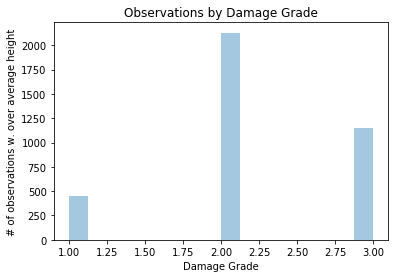

In [34]:
over_average_area = quaketrainlabeled[quaketrainlabeled['area'] > np.mean(quaketrainlabeled['area'])]

sns.distplot(over_average_area['damage_grade'], kde=False)
plt.xlabel('Damage Grade')
plt.ylabel('# of observations w. over average height')
plt.title('Observations by Damage Grade')
plt.show()